# I. Installation Requirements & Data Import

In [1]:
# Install required dependencies
import h5py
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm
import pandas as pd
import numpy as np
import altair as alt
from sklearn.metrics import mean_squared_error as mse
# Optional for clear plotting on Macs
%config InlineBackend.figure_format = 'retina'

In [3]:
# Uncomment code below to download data
# !wget -q  https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_train.h5
# !wget -q  https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_val.h5
# !wget -q https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_test.h5

In [4]:
trainset = h5py.File("09072022_1154_train.h5", "r")
validateset = h5py.File("09072022_1154_val.h5", "r")
testset = h5py.File("09072022_1154_test.h5", "r")

# II. Data Exploration

#### 1. Identify attributes of trainset

In [5]:
trainset.keys()

<KeysViewHDF5 ['agbd', 'cloud', 'images', 'lat', 'lon', 'scl']>

#### 2. Calculate total baseline RMSE in test data reported in Results

In [9]:
print(
    f"Total baseline RMSE in test dataset:\
{mse(testset['agbd'][()], testset['agbd'][()].mean() * np.ones(testset['agbd'][()].shape[0]), squared=False): .2f}."
)

Total baseline RMSE in test dataset: 65.18.


#### 3. Investigate the above ground biomass density (agbd) - target variable distribution

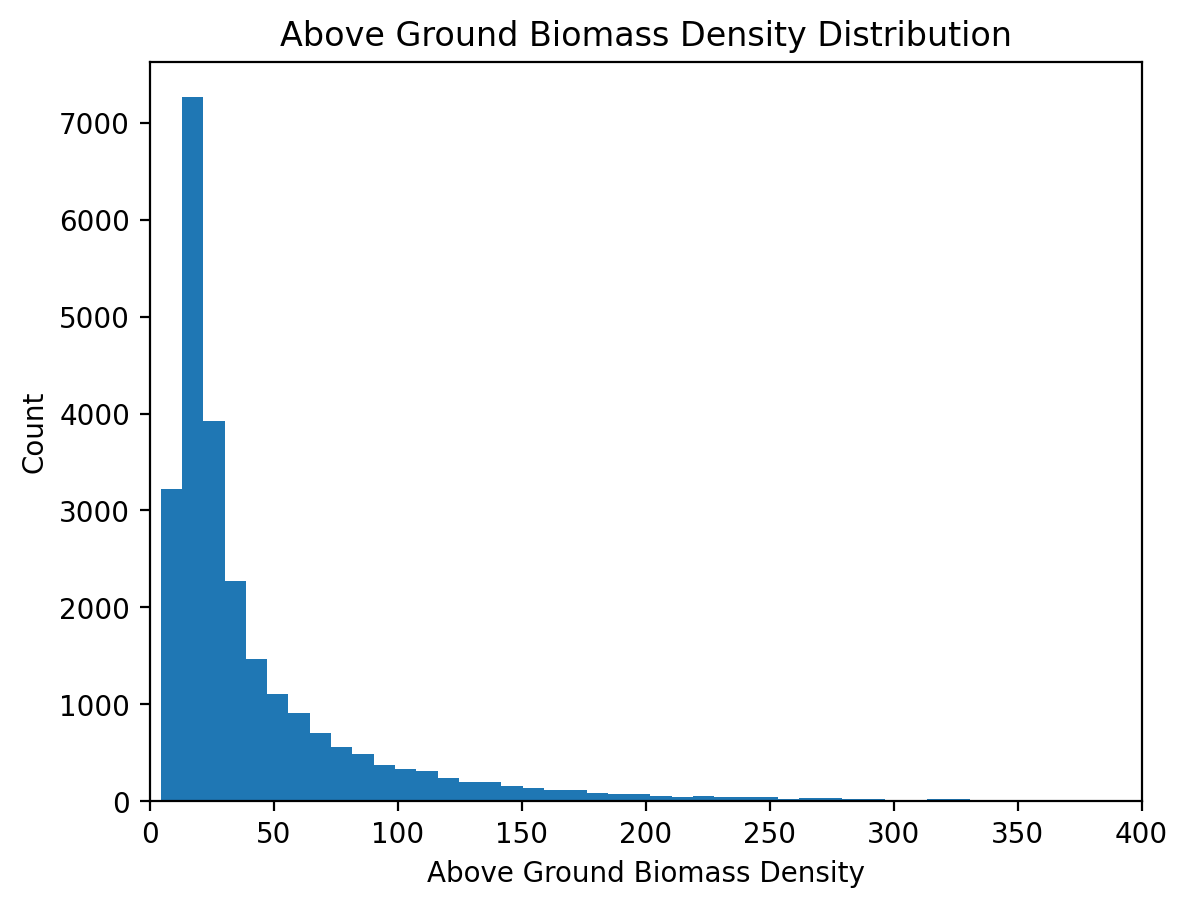

In [13]:
plt.hist(np.array(trainset["agbd"]), bins=100)
plt.xlim(0, 400)
plt.xlabel("Above Ground Biomass Density")
plt.ylabel("Count")
plt.title("Above Ground Biomass Density Distribution")
plt.show()

#### 4. Explore the distribution of 12 Spectral Bands

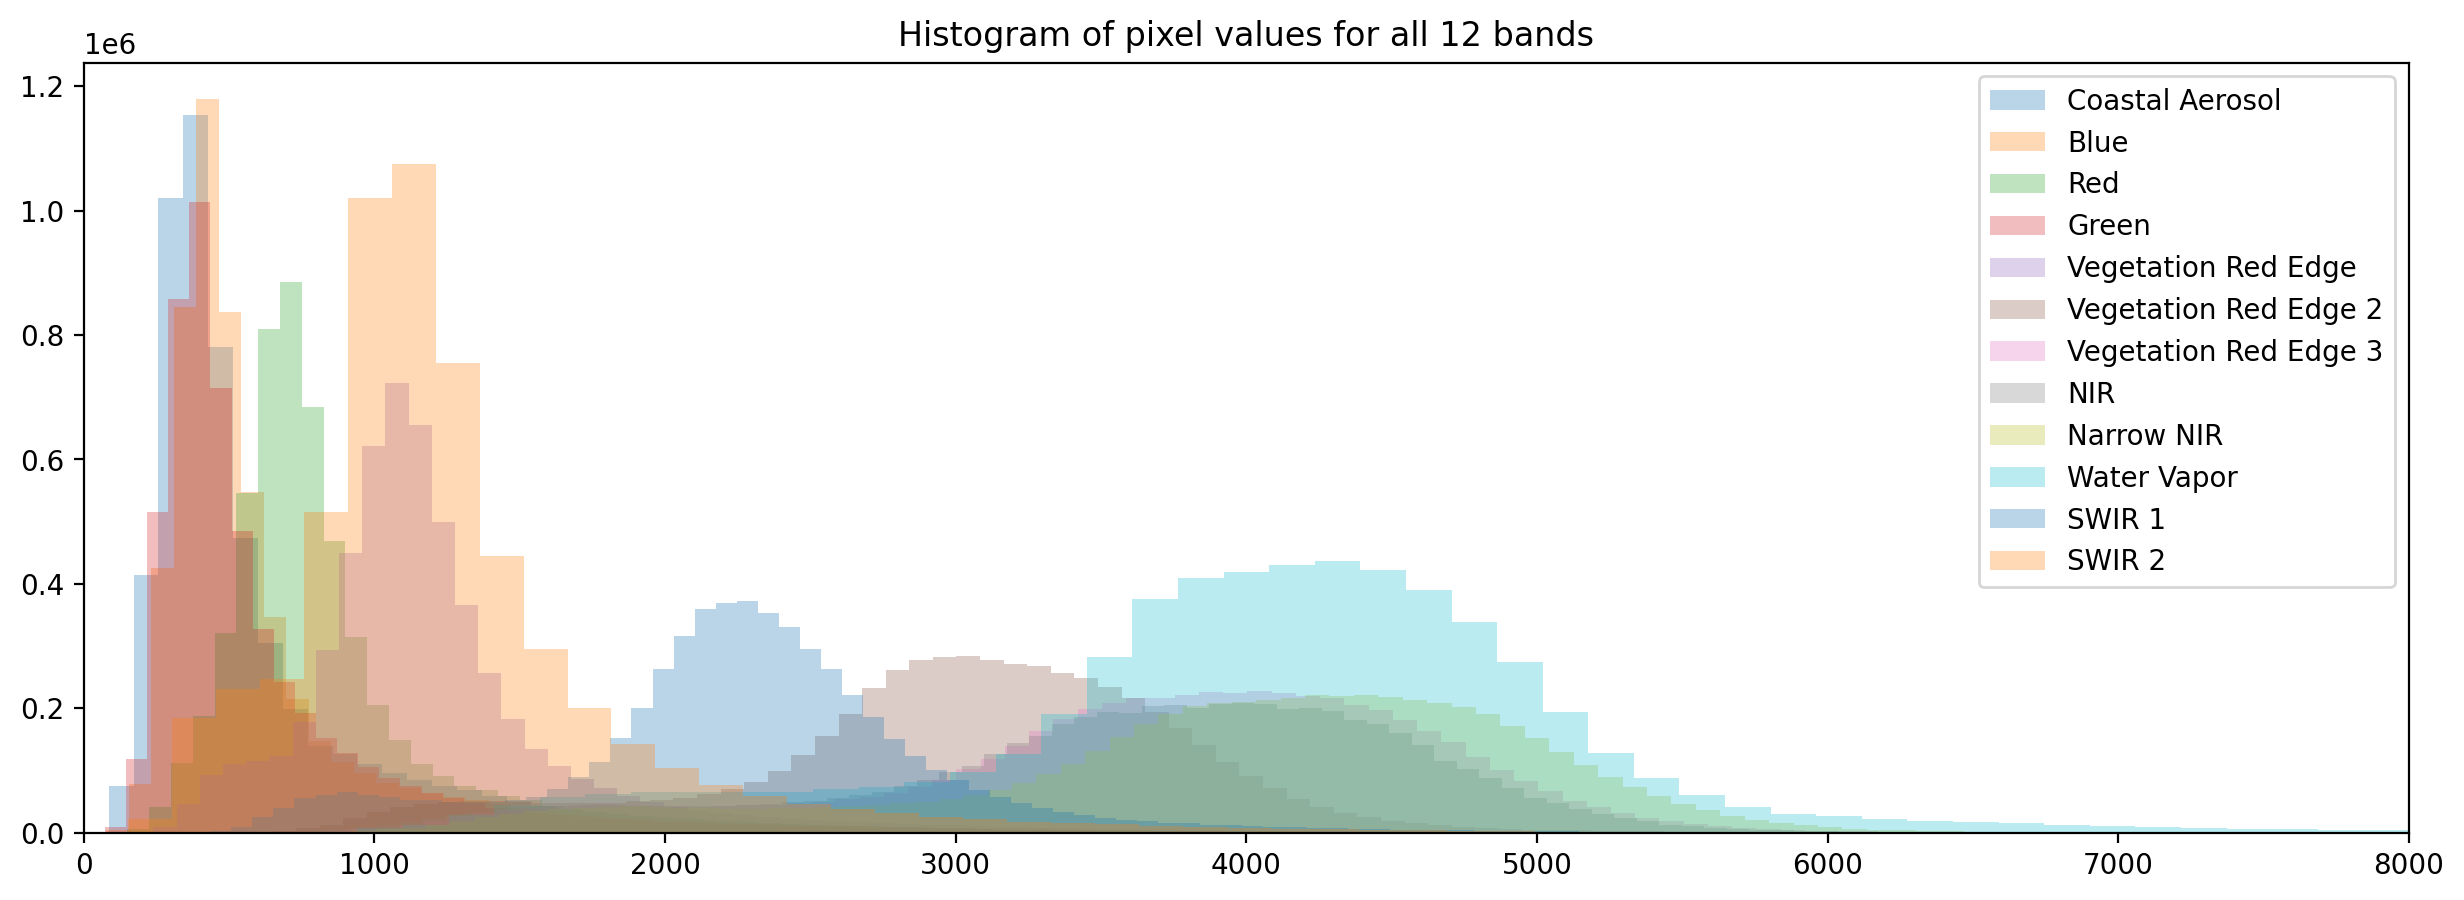

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

for i in range(0, 12):
    axs.hist(
        np.array(trainset["images"])[:, :, :, i].reshape(-1),
        bins=100,
        alpha=0.3,
        label=i,
    )

axs.legend(
    [
        "Coastal Aerosol",
        "Blue",
        "Red",
        "Green",
        "Vegetation Red Edge",
        "Vegetation Red Edge 2",
        "Vegetation Red Edge 3",
        "NIR",
        "Narrow NIR",
        "Water Vapor",
        "SWIR 1",
        "SWIR 2",
    ]
)
axs.set_xlim(0, 8_000)
axs.set_title("Histogram of pixel values for all 12 bands")
plt.show()

#### 5. Image Exploration

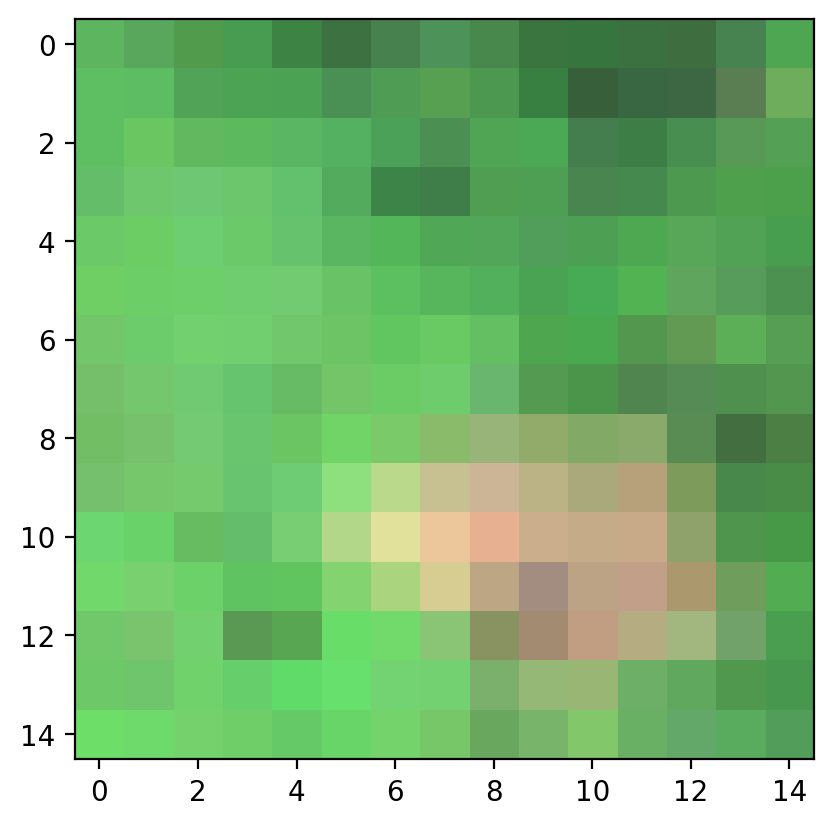

In [16]:
plt.imshow(np.array(trainset["images"])[0, :, :, [3, 2, 1]].T / 1_000)
plt.show()

### 6. Image Location Exploration

In [15]:
alt.Chart(
    pd.DataFrame(
        {
            "latitude": np.array(trainset["lat"])[[2, 3, 4, 5, 6, 7, 8, 9]].reshape(-1),
            "longitude": np.array(trainset["lon"])[[2, 3, 4, 5, 6, 7, 8, 9]].reshape(
                -1
            ),
            "red": np.array(trainset["images"])[
                [2, 3, 4, 5, 6, 7, 8, 9], :, :, 2
            ].reshape(-1)
            / 700,
        }
    )
).mark_point().encode(
    x=alt.X("longitude:Q", scale=alt.Scale(zero=False)),
    y=alt.Y("latitude:Q", scale=alt.Scale(zero=False)),
    color="red:Q",
)

alt.Chart(...)

In [16]:
alt.Chart(
    pd.DataFrame(
        {
            "latitude": np.array(trainset["lat"])[[2, 3, 4, 5, 6, 7, 8, 9, 10]].reshape(
                -1
            ),
            "longitude": np.array(trainset["lon"])[
                [2, 3, 4, 5, 6, 7, 8, 9, 10]
            ].reshape(-1),
            "red": np.array(trainset["images"])[
                [2, 3, 4, 5, 6, 7, 8, 9, 10], :, :, 2
            ].reshape(-1)
            / 700,
        }
    )
).mark_point().encode(
    x=alt.X("longitude:Q", scale=alt.Scale(zero=False)),
    y=alt.Y("latitude:Q", scale=alt.Scale(zero=False)),
    color="red:Q",
)

alt.Chart(...)

#### 7. Explore datasets

In [22]:
# train
train_images = np.array(trainset["images"], dtype=np.float64)
train_images = train_images.transpose(0, 3, 1, 2)
train_biomasses = np.array(trainset["agbd"], dtype=np.float64)

# validate
validate_images = np.array(validateset["images"], dtype=np.float64)
validate_images = validate_images.transpose(0, 3, 1, 2)
validate_biomasses = np.array(validateset["agbd"], dtype=np.float64)

# test
test_images = np.array(testset["images"], dtype=np.float32)
test_images = test_images.transpose(0, 3, 1, 2)
test_biomasses = np.array(testset["agbd"], dtype=np.float32)

In [23]:
print(f"train dataset size {train_images.shape} train lab size {train_biomasses.shape}")
print()
print(f"validate dataset size {validate_images.shape} validate lab size {validate_biomasses.shape}")
print()
print(f"test dataset size {test_images.shape} test lab size {test_biomasses.shape}")

train dataset size (25036, 12, 15, 15) train lab size (25036,)

validate dataset size (5174, 12, 15, 15) validate lab size (5174,)

test dataset size (5190, 12, 15, 15) test lab size (5190,)


####  8. Additional visulizations

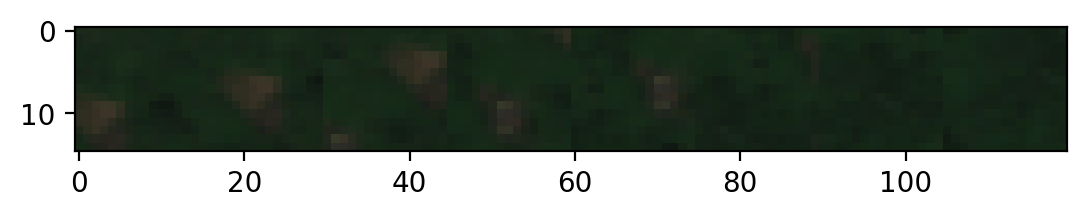

In [25]:
plt.imshow(
    np.concatenate(
        (
            train_images[2, [3, 2, 1], :, :].T / 4095,
            train_images[3, [3, 2, 1], :, :].T / 4095,
            train_images[4, [3, 2, 1], :, :].T / 4095,
            train_images[5, [3, 2, 1], :, :].T / 4095,
            train_images[6, [3, 2, 1], :, :].T / 4095,
            train_images[7, [3, 2, 1], :, :].T / 4095,
            train_images[8, [3, 2, 1], :, :].T / 4095,
            train_images[9, [3, 2, 1], :, :].T / 4095,
        ),
        axis=1,
    )
)
plt.show()

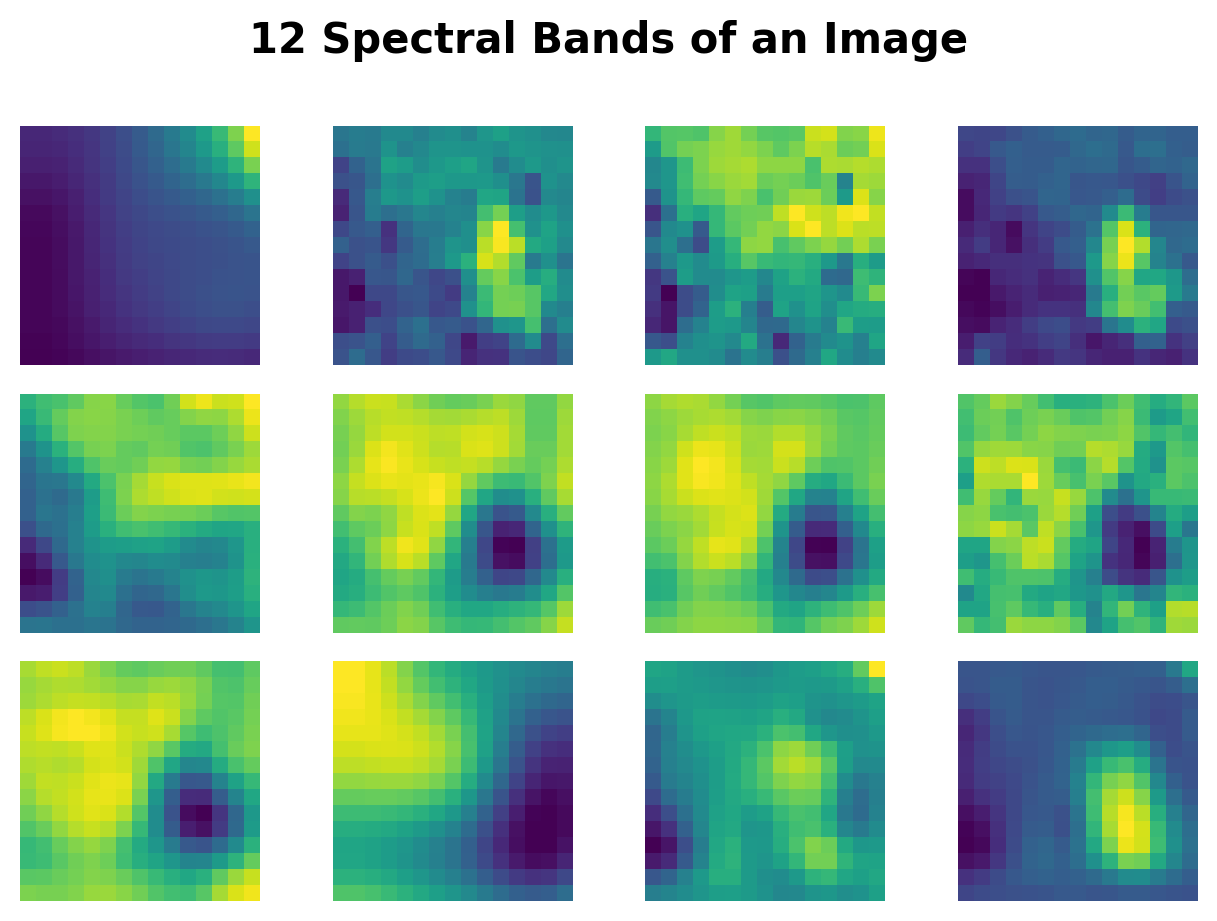

In [28]:
plt.figure()
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(train_images[0, i, :, :])
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.suptitle("12 Spectral Bands of an Image", fontsize=15, fontweight="bold")
plt.show()

#### 9. Explore the skewness of train dataset in each channel

In [ ]:
band_skewness = []
band_skewness_after_sqrt = []
for c in range(12):
    # calculate skewness
    band_skewness.append(pd.Series(train_images[:, c].flatten()).skew())
    # calculate skewness after applying sqrt
    band_skewness_after_sqrt.append(
        pd.Series(np.sqrt(train_images[:, c].flatten())).skew()
    )

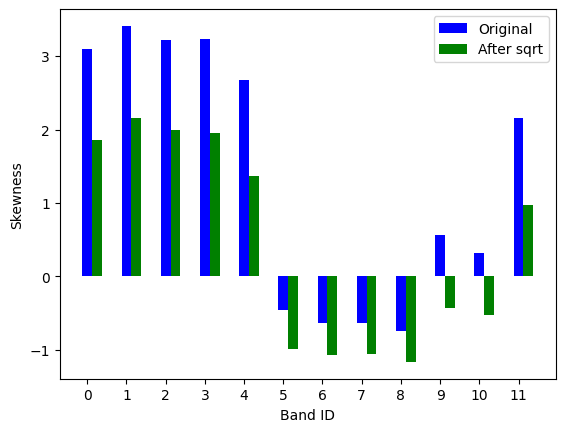

In [ ]:
# skweness
width = 0.25

rng = [i for i in range(0, 12)]
rng2 = [i + width for i in range(0, 12)]

plt.bar(rng, band_skewness, align="center", width=width, label="Original", color="b")
plt.bar(
    rng2,
    band_skewness_after_sqrt,
    align="center",
    width=width,
    label="After sqrt",
    color="g",
)
plt.gca().set_xticks(rng)
plt.legend()
plt.xlabel("Band ID")
plt.ylabel("Skewness")
plt.show()